# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [28]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.cm as cm
from sklearn import neighbors, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

In [2]:
# Your code here
data = pd.read_csv('data_all/data_all.csv', dtype = 'float')
#data = np.loadtxt('data_all/data_all.csv', delimiter=',', dtype = 'str')

In [3]:
data.shape

(116322, 785)

In [4]:
image = np.array(data.iloc[2,1:])

In [5]:
data.iloc[2,0]

3.0

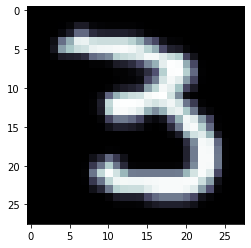

In [6]:
# Your code here
fig, ax = plt.subplots()
#ax.imshow(image.reshape(28, 28), cmap=plt.cm.bone, interpolation='nearest') 
ax.imshow(image.reshape(28, 28), cmap=plt.cm.bone) 

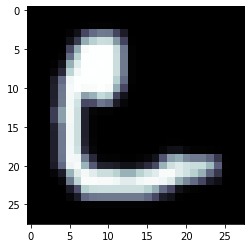

In [7]:
image = np.array(data.iloc[34,1:])
fig, ax = plt.subplots()
ax.imshow(image.reshape(28, 28), cmap=plt.cm.bone) 

In [8]:
data.iloc[34,0]
#data[data['e'] == '38.0']
#e translates into the number 0-9, then capital letters, then lower-case letters

38.0

In [38]:
def letter_mapping(e_num):
    """
    Converts number from e_column into corresponding letter or number
    :param  e_num from sequence 0-9, then capital letters, then lower-case letters
    returns corresponding actual letter
    """
    if e_num < 10:
        return str(e_num)
    elif e_num < 36:
        return chr(int(e_num - 10 + 65))
    else:
        return chr(int(e_num - 36 + 97))

letter_mapping(38)

'c'

# Uppercase Letters

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [10]:
df_upper_case = data[(data['e'] > 9) & (data['e'] < 36)]

X = df_upper_case.drop(columns = ['e'])
y = df_upper_case['e']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [31]:
#num_neighbors = 5
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [34]:
labels = np.sort(y.unique())
class_names = list(map(letter_mapping, labels))

print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y_train, y_pred_train, labels = labels, target_names = class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y_test,y_pred_test, labels = labels, target_names=class_names))




****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

           A       0.92      0.93      0.93       846
           B       0.99      0.76      0.86       522
           C       0.87      0.97      0.92      1379
           D       0.94      0.72      0.81       628
           E       0.98      0.87      0.92       693
           F       0.90      0.89      0.89      1158
           G       0.99      0.78      0.87       359
           H       0.92      0.86      0.89       416
           I       0.84      0.98      0.91      1630
           J       0.91      0.82      0.86       497
           K       0.95      0.80      0.87       309
           L       0.88      0.94      0.91       646
           M       0.98      0.96      0.97      1194
           N       0.90      0.95      0.93      1064
           O       0.90      0.99      0.94      3374
           P       0.86      0.92      0.89  

In [11]:
params={'random_state':0,'max_depth':4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [12]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [13]:
print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y_train, y_pred_train, labels = labels, target_names = class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y_test,y_pred_test, labels = labels, target_names=class_names))




****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

           A       0.32      0.43      0.37       846
           B       0.00      0.00      0.00       522
           C       0.48      0.61      0.54      1379
           D       0.28      0.24      0.26       628
           E       0.15      0.43      0.22       693
           F       0.42      0.22      0.29      1158
           G       0.00      0.00      0.00       359
           H       0.00      0.00      0.00       416
           I       0.32      0.92      0.48      1630
           J       0.00      0.00      0.00       497
           K       0.00      0.00      0.00       309
           L       0.00      0.00      0.00       646
           M       0.50      0.61      0.55      1194
           N       0.37      0.65      0.47      1064
           O       0.79      0.81      0.80      3374
           P       0.00      0.00      0.00  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
classifier= RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [22]:
# Your code here
print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y_train, y_pred_train, labels = labels, target_names = class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y_test,y_pred_test, labels = labels, target_names=class_names))




****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

           A       0.68      0.39      0.49       846
           B       0.00      0.00      0.00       522
           C       0.48      0.78      0.60      1379
           D       0.00      0.00      0.00       628
           E       0.00      0.00      0.00       693
           F       0.61      0.32      0.42      1158
           G       0.00      0.00      0.00       359
           H       0.00      0.00      0.00       416
           I       0.44      0.91      0.59      1630
           J       0.00      0.00      0.00       497
           K       0.00      0.00      0.00       309
           L       0.93      0.04      0.08       646
           M       0.65      0.92      0.76      1194
           N       0.53      0.58      0.55      1064
           O       0.61      0.95      0.74      3374
           P       0.64      0.74      0.68  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
classifier = OneVsOneClassifier(LinearSVC(random_state=0,max_iter=4000))
classifier.fit(X_train,y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
# Your code here
print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y_train, y_pred_train, labels = labels, target_names = class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y_test,y_pred_test, labels = labels, target_names=class_names))




****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       846
           B       1.00      1.00      1.00       522
           C       1.00      1.00      1.00      1379
           D       1.00      1.00      1.00       628
           E       1.00      1.00      1.00       693
           F       0.99      1.00      1.00      1158
           G       1.00      1.00      1.00       359
           H       1.00      1.00      1.00       416
           I       1.00      1.00      1.00      1630
           J       0.99      1.00      1.00       497
           K       1.00      1.00      1.00       309
           L       1.00      1.00      1.00       646
           M       1.00      1.00      1.00      1194
           N       1.00      1.00      1.00      1064
           O       1.00      1.00      1.00      3374
           P       1.00      0.99      1.00  

# Lowercase Letters

* Try to do the same thing with lowercases.

In [40]:
df_lower_case = data[data['e'] > 35]

X = df_lower_case.drop(columns = ['e'])
y = df_lower_case['e']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

labels = np.sort(y.unique())

In [59]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

def print_classification_report(y_true, y_pred, labels, desc):
    """
    Print classification report
    returns None
    """
    class_names = list(map(letter_mapping, labels))
    print('\n'+"*"*40)
    print(f'\n Classifier performance on {desc} dataset\n')
    report = classification_report(y_true, y_pred, labels = labels, target_names = class_names)
    print(report)
    
# Convergence warning is taking up too much space in my output, so I'm ignoring it now
@ignore_warnings(category = ConvergenceWarning)
def run_classifier(classifier_func, X_train, X_test, y_train, y_test, labels):
    """
    Takes classifier function, gets predictions for train/test sets and prints reports
    by calling an additional function.
    
    returns None
    """
    classifier_func.fit(X_train,y_train)
    
    y_pred_train = classifier_func.predict(X_train)
    print_classification_report(y_train, y_pred_train, labels, "Training")
    
    y_pred_test = classifier_func.predict(X_test)
    print_classification_report(y_test, y_pred_test, labels, "Testing")

In [53]:
# K neighbor
classifier = neighbors.KNeighborsClassifier()
run_classifier(classifier, X_train, X_test, y_train, y_test, labels)


****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

           a       0.88      0.92      0.90      1331
           b       0.95      0.90      0.92       689
           c       0.87      0.83      0.85       354
           d       0.96      0.94      0.95      1324
           e       0.95      0.99      0.97      3255
           f       0.95      0.66      0.78       321
           g       0.86      0.63      0.73       473
           h       0.90      0.92      0.91      1178
           i       0.71      0.47      0.57       342
           j       0.87      0.78      0.82       261
           k       0.96      0.72      0.82       371
           l       0.78      0.98      0.87      2001
           m       0.98      0.94      0.96       368
           n       0.93      0.96      0.94      1524
           o       0.85      0.93      0.89       366
           p       0.89      0.84      0.86    

In [52]:
# OnevsOne
classifier = OneVsOneClassifier(LinearSVC(random_state=0,max_iter=4000))
run_classifier(classifier, X_train, X_test, y_train, y_test, labels)


****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

           a       1.00      0.99      0.99      1331
           b       1.00      1.00      1.00       689
           c       1.00      1.00      1.00       354
           d       1.00      1.00      1.00      1324
           e       0.99      1.00      1.00      3255
           f       0.99      1.00      1.00       321
           g       0.99      1.00      0.99       473
           h       1.00      1.00      1.00      1178
           i       0.92      0.52      0.66       342
           j       1.00      1.00      1.00       261
           k       0.99      1.00      0.99       371
           l       0.93      0.99      0.96      2001
           m       1.00      1.00      1.00       368
           n       1.00      1.00      1.00      1524
           o       1.00      1.00      1.00       366
           p       1.00      1.00      1.00    

In [49]:
# Random Forest
classifier= RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0)
run_classifier(classifier, X_train, X_test, y_train, y_test, labels)




****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

           a       0.50      0.42      0.46      1331
           b       0.81      0.33      0.47       689
           c       0.00      0.00      0.00       354
           d       0.61      0.78      0.68      1324
           e       0.51      0.93      0.66      3255
           f       0.00      0.00      0.00       321
           g       0.00      0.00      0.00       473
           h       0.54      0.66      0.59      1178
           i       0.00      0.00      0.00       342
           j       0.00      0.00      0.00       261
           k       0.00      0.00      0.00       371
           l       0.61      0.94      0.74      2001
           m       1.00      0.01      0.02       368
           n       0.66      0.83      0.74      1524
           o       0.00      0.00      0.00       366
           p       0.00      0.00      0.00  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





****************************************

 Classifier performance on Testing dataset

              precision    recall  f1-score   support

           a       0.49      0.36      0.42       313
           b       0.72      0.31      0.43       164
           c       0.00      0.00      0.00        78
           d       0.62      0.76      0.68       359
           e       0.51      0.95      0.66       837
           f       0.00      0.00      0.00        79
           g       0.00      0.00      0.00       116
           h       0.56      0.62      0.59       301
           i       0.00      0.00      0.00        85
           j       0.00      0.00      0.00        56
           k       0.00      0.00      0.00        95
           l       0.62      0.94      0.75       534
           m       1.00      0.02      0.04        96
           n       0.63      0.78      0.70       374
           o       0.00      0.00      0.00       100
           p       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
#Decision Tree
params={'random_state':0,'max_depth':4}
classifier = DecisionTreeClassifier(**params)
run_classifier(classifier, X_train, X_test, y_train, y_test, labels)


****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

           a       0.39      0.70      0.50      1331
           b       0.25      0.45      0.32       689
           c       0.00      0.00      0.00       354
           d       0.35      0.67      0.46      1324
           e       0.67      0.84      0.75      3255
           f       0.00      0.00      0.00       321
           g       0.00      0.00      0.00       473
           h       0.62      0.58      0.60      1178
           i       0.00      0.00      0.00       342
           j       0.00      0.00      0.00       261
           k       0.00      0.00      0.00       371
           l       0.67      0.86      0.75      2001
           m       0.00      0.00      0.00       368
           n       0.79      0.66      0.72      1524
           o       0.00      0.00      0.00       366
           p       0.00      0.00      0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Numbers (0-9)

* Try to do the same thing with numbers.

In [54]:
# Your code here
df_numbers = data[data['e'] < 10]

X = df_numbers.drop(columns = ['e'])
y = df_numbers['e']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

labels = np.sort(y.unique())

In [62]:
# K neighbor
classifier = neighbors.KNeighborsClassifier()
run_classifier(classifier, X_train, X_test, y_train, y_test, labels)


****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      4688
         1.0       0.96      1.00      0.98      5046
         2.0       0.99      0.98      0.98      4659
         3.0       0.97      0.99      0.98      4736
         4.0       0.98      0.97      0.98      4485
         5.0       0.99      0.98      0.98      4140
         6.0       0.99      0.99      0.99      4576
         7.0       0.97      0.98      0.98      4920
         8.0       1.00      0.95      0.97      4535
         9.0       0.98      0.97      0.97      4549

    accuracy                           0.98     46334
   macro avg       0.98      0.98      0.98     46334
weighted avg       0.98      0.98      0.98     46334


****************************************

 Classifier performance on Testing dataset

              precision    recall  f1-score   support

         0.

In [61]:
# OnevsOne
classifier = OneVsOneClassifier(LinearSVC(random_state=0,max_iter=4000))
run_classifier(classifier, X_train, X_test, y_train, y_test, labels)


****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4688
         1.0       0.99      0.99      0.99      5046
         2.0       0.99      0.99      0.99      4659
         3.0       0.96      0.98      0.97      4736
         4.0       0.99      0.99      0.99      4485
         5.0       0.97      0.95      0.96      4140
         6.0       1.00      1.00      1.00      4576
         7.0       0.99      0.97      0.98      4920
         8.0       0.96      0.95      0.96      4535
         9.0       0.96      0.98      0.97      4549

    accuracy                           0.98     46334
   macro avg       0.98      0.98      0.98     46334
weighted avg       0.98      0.98      0.98     46334


****************************************

 Classifier performance on Testing dataset

              precision    recall  f1-score   support

         0.

In [55]:
# Random Forest
classifier= RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0)
run_classifier(classifier, X_train, X_test, y_train, y_test, labels)


****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      4688
         1.0       0.81      0.97      0.88      5046
         2.0       0.91      0.81      0.86      4659
         3.0       0.85      0.80      0.83      4736
         4.0       0.87      0.87      0.87      4485
         5.0       0.92      0.70      0.79      4140
         6.0       0.82      0.89      0.85      4576
         7.0       0.83      0.83      0.83      4920
         8.0       0.81      0.60      0.69      4535
         9.0       0.66      0.85      0.75      4549

    accuracy                           0.83     46334
   macro avg       0.84      0.83      0.82     46334
weighted avg       0.84      0.83      0.83     46334


****************************************

 Classifier performance on Testing dataset

              precision    recall  f1-score   support

         0.

In [60]:
#Decision Tree
params={'random_state':0,'max_depth':4}
classifier = DecisionTreeClassifier(**params)
run_classifier(classifier, X_train, X_test, y_train, y_test, labels)


****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82      4688
         1.0       0.83      0.90      0.87      5046
         2.0       0.83      0.61      0.70      4659
         3.0       0.68      0.53      0.60      4736
         4.0       0.84      0.67      0.74      4485
         5.0       0.45      0.74      0.56      4140
         6.0       0.49      0.76      0.60      4576
         7.0       0.78      0.75      0.77      4920
         8.0       0.36      0.24      0.29      4535
         9.0       0.64      0.70      0.67      4549

    accuracy                           0.67     46334
   macro avg       0.69      0.66      0.66     46334
weighted avg       0.69      0.67      0.67     46334


****************************************

 Classifier performance on Testing dataset

              precision    recall  f1-score   support

         0.

# Summary
## Upper Case Letters
Rankings of the best classification methods (best to worst):
1. K- Neighbors Classifier (also the longest to run, ~30 minutes)
2. OnevsOne (got 100% on the training set)
3. Random Forest
4. Decision Tree

## Lower Case Letters
1. K- Neighbors Classifier (also the longest to run, ~20 minutes)
2. OnevsOne (scored almost 100% on the training set)
3. Random Forest
4. Decision Tree

## Numbers (0-9)
This one had the best overall results
1. K- Neighbors Classifier (also the longest to run, over an hour)
2. OnevsOne (scored almost 100% on the training set)
3. Random Forest
4. Decision Tree